### Goal

Explore correlation between school size and number of students eligible for free and reduced price lunches

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import data sets
membership_df = pd.read_csv('m1415.csv', sep='\t')
school_df = pd.read_csv('s1415.csv', sep='\t')
lunch_df = pd.read_csv('frpl1415.csv', sep='\t')

In [62]:
# Join data sets
memschool_df = pd.merge(membership_df, school_df, how='left', on=['NCESSCH','NCESSCH'])
memlunch_df = pd.merge(membership_df, lunch_df, how='left', on=['NCESSCH','NCESSCH'])

In [63]:
# Ensure joining didn't filter or proliferate records
memschool_df.NCESSCH.count()

100187

In [64]:
# Ensure joining didn't filter or proliferate records
memlunch_df.NCESSCH.count()

100187

In [65]:
# Filter out `-1` values
lunch_df = memlunch_df[memlunch_df['TOTAL'] != -1]
lunch_df = memlunch_df[memlunch_df['TOTFRL'] != -1]
lunch_df.NCESSCH.count()

97275

### Finding

There seems to be a small correlation between total free-and-reduced-price-lunch and total enrollment, but the fact that there are many schools that have enrollment that do not have free-and-reduced-price-lunch eligible students discouraged further exploration.

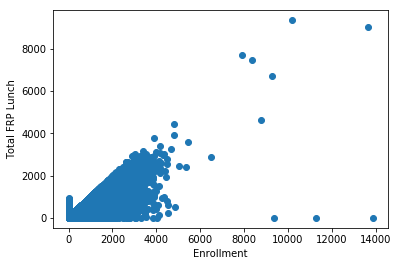

In [71]:
# Visualize data to detect possible correlation
plt.scatter(lunch_df.TOTAL, lunch_df.TOTFRL)
plt.xlabel('Enrollment')
plt.ylabel('Total FRP Lunch')
plt.title('NCES 2014-15 Total FRP Lunch by Enrollment')

### Pivot

Explore total enrollment by grade

Attempted to filter out enrollments below zero, but realized that there are very few schools with all grades from preschool to grade 12.

In [69]:
grades = ['PK', 'KG', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12']

grades_df = memschool_df

for grade in grades:
    grades_df = grades_df[grades_df[grade] >= 0]

grades_df.NCESSCH.count()

1218

### Ending Analysis

Although this data set contains the negative values in each grade-enrollment column, it is still useful to see a trend. The noticeable spike at grade 9 followed by the gradual decline through grade 12 is worth future investigation.

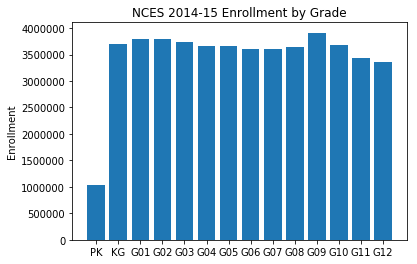

In [70]:
grade_nums = np.arange(len(grades))
enrollment = memschool_df[grades].sum()
plt.bar(grade_nums, enrollment)
plt.xticks(grade_nums, grades)
plt.ylabel('Enrollment')
plt.title('NCES 2014-15 Enrollment by Grade')